<a href="https://colab.research.google.com/github/GrueneKatze/MOOC/blob/main/MLOps_1_W1_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/https-deeplearning-ai/MLEP-public.git

Cloning into 'MLEP-public'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 213 (delta 82), reused 152 (delta 41), pack-reused 0
Receiving objects: 100% (213/213), 15.01 MiB | 17.80 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [3]:
path = '/content/MLEP-public/course1/week1-ungraded-lab'
pathi = '/content/MLEP-public/course1/week1-ungraded-lab/images'

In [10]:
from pathlib import Path
import os

In [8]:
ims = Path(pathi)

In [23]:
pathi +'/'+'apple.jpg'

'/content/MLEP-public/course1/week1-ungraded-lab/images/apple.jpg'

In [11]:
os.listdir(ims)

['car3.jpg',
 'apples.jpg',
 'car.jpg',
 'clock2.jpg',
 'car1.jpg',
 'car2.jpg',
 'oranges.jpg',
 'fruits.jpg',
 'clock3.jpg',
 'clock.jpg',
 'apple.jpg']

In [ ]:
#!cd MLEP-public/course1/week1-ungraded-lab

In [ ]:
#!pip install -r requirements.txt

In [5]:
from IPython.display import Image, display


Displaying image: car3.jpg


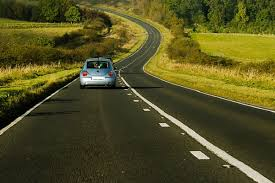


Displaying image: apples.jpg


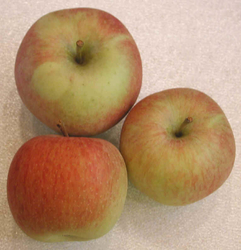


Displaying image: car.jpg


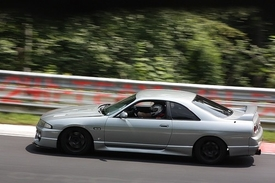


Displaying image: clock2.jpg


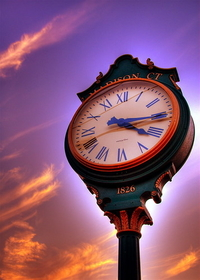


Displaying image: car1.jpg


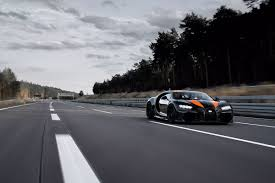


Displaying image: car2.jpg


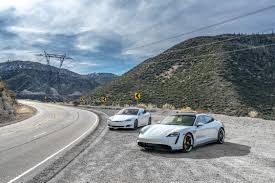


Displaying image: oranges.jpg


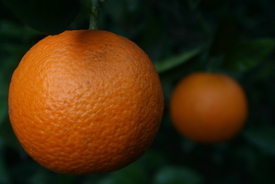


Displaying image: fruits.jpg


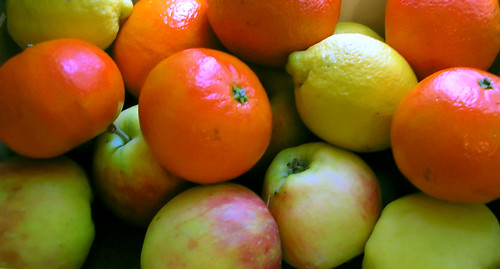


Displaying image: clock3.jpg


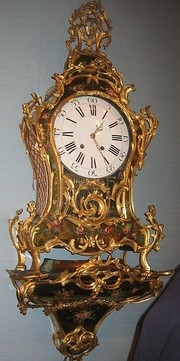


Displaying image: clock.jpg


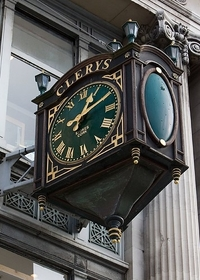


Displaying image: apple.jpg


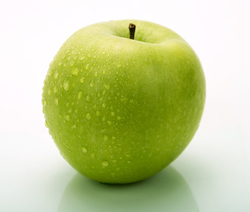

In [24]:
# Some example images
image_files = [
    'apple.jpg',
    'clock.jpg',
    'oranges.jpg',
    'car.jpg'
]

for image_file in os.listdir(ims):#pathi:
    print(f"\nDisplaying image: {image_file}")
    display(Image(filename=pathi+'/'+image_file))
    #display(Image(filename=f"images/{image_file}"))

In [25]:
dir_name = "images_with_boxes"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [27]:
import cv2
!pip install cvlib

     |████████████████████████████████| 10.1MB 8.4MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-cp37-none-any.whl size=10044621 sha256=c7abc417707f9be66b9631e48e55a433e3714a2e9b6760d4659ca57aa3dcfe60
  Stored in directory: /root/.cache/pip/wheels/5e/a4/99/8dfcae03a6f93bb4084650d0b642ef5a472429928fb95ffd01
  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12083 sha256=8286a88736db5eaa797a68d81d44f30a626fa31cef7b5aa682459271722db6e9
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


In [28]:
import cvlib as cv

In [29]:


from cvlib.object_detection import draw_bbox


def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.5):
    """Detects common objects on an image and creates a new image with bounding boxes.

    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.5.
    """
    
    # Images are stored under the images/ directory
    img_filepath = pathi+'/'+filename#f'images/{filename}'
    
    # Read the image into a numpy array
    img = cv2.imread(img_filepath)
    
    # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    
    # Print current image's filename
    print(f"========================\nImage processed: {filename}\n")
    
    # Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}\n")
    
    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)
    
    # Save the image in the directory images_with_boxes
    cv2.imwrite(f'images_with_boxes/{filename}', output_image)
    
    # Display the image with bounding boxes
    display(Image(f'images_with_boxes/{filename}'))

Image processed: apple.jpg

Detected object: apple with confidence level of 0.571721076965332



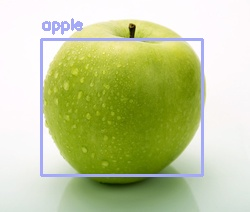

Image processed: clock.jpg

Detected object: clock with confidence level of 0.9683184623718262



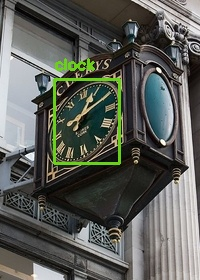

Image processed: oranges.jpg

Detected object: orange with confidence level of 0.618558943271637

Detected object: orange with confidence level of 0.5561690330505371



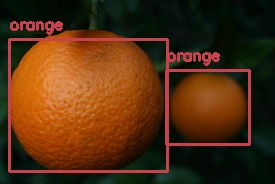

Image processed: car.jpg

Detected object: car with confidence level of 0.632540762424469



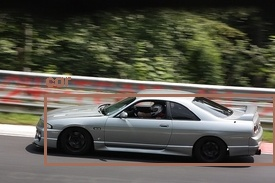

In [30]:
for image_file in image_files:
    detect_and_draw_box(image_file)

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818482041358948

Detected object: orange with confidence level of 0.5346484184265137

Detected object: orange with confidence level of 0.5150989890098572



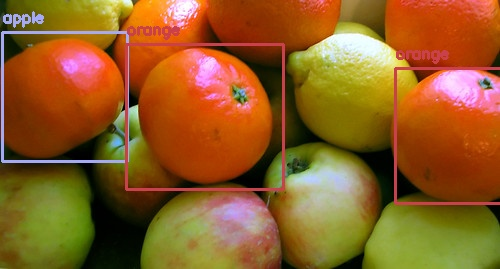

In [31]:
detect_and_draw_box("fruits.jpg")

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818482041358948

Detected object: orange with confidence level of 0.5346484184265137

Detected object: orange with confidence level of 0.5150989890098572

Detected object: apple with confidence level of 0.3475987911224365

Detected object: orange with confidence level of 0.3287609815597534

Detected object: apple with confidence level of 0.31244683265686035

Detected object: orange with confidence level of 0.27986058592796326

Detected object: orange with confidence level of 0.27499768137931824

Detected object: apple with confidence level of 0.27445051074028015

Detected object: orange with confidence level of 0.21419072151184082



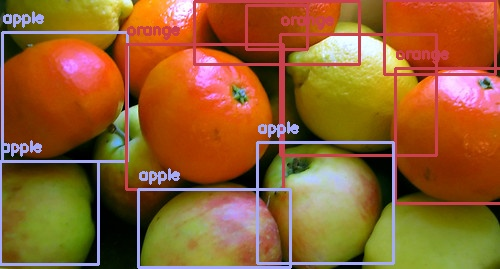

In [32]:
detect_and_draw_box("fruits.jpg", confidence=0.2)